# Heavy Traffic Indicators on I-94

## Interstate 94

Interstate 94 (I-94) is an east-west Interstate Highway connecting the Great Lakes and northern Great Plains regions of the United States. It lies along the primary overland route from Seattle to Toronto and is the only east-west Interstate highway to have a direct connection to Canada.

![](https://www.google.com/maps/vt/data=QgfFfHXqNNEl9B4PI2UY988qjqSzLtY8sBRFDwh867YvU8pwB42hE4yUPXmjvlcteznsrEPsCMWhD1Tn4HPECI5DQBPRKajDdJcKEmx_wGq9yuM6lud_XF4YaAZEzRI3TvLk_b2KbyJk9-bm1dIPXliJ9VSq4ksHIw8DoTMEXl4MmjMciW99LrPhKeOb3pPw6N_P6MWF93fHoD_soXmE1-E21sAJRxk_e15qIJFn7B7T826Y6oLmTlnb4HmZc2sacRbqW3wzgXy6idQD)

*Interstate 94 highlighted in red*

## Project and Data Overview

Our goal is to analyze the traffic data made available by *John Hogue*, then determine a few indicators of heavy traffic on I-94. We will explore the data, examine relationships and create some visualizations. You can download the dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume#).

The dataset documentation mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. The station only records cars moving from east to west. Hence **our results are limited to the westbound traffic in the proximity of that station**. They are not applicable to the entire I-94 highway.

Here is a description of the columns in the dataset:

- `holiday`:- US National holidays plus regional holidays 
- `temp`:- Average temperature in kelvin 
- `rain_1h`:- Amount in millimetres of rain that occurred in the hour 
- `snow_1h`:- Amount in millimetres of snow that occurred in the hour 
- `clouds_all`:- Percentage of cloud cover 
- `weather_main`:- Short textual description of the current weather 
- `weather_description`:- Longer textual description of the current weather 
- `date_time`:- Time of data collection in local CST time 
- `traffic_volume`:- Hourly I-94 ATR 301 reported westbound traffic volume

## Importing Libraries

In [1]:
# Ignore future warnings from pandas
import warnings
warnings.filterwarnings('ignore')

# Useful libraries
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
metro = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
metro.head(3)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767


In [3]:
metro.tail(3)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [4]:
metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


### Initial Notes
- *The traffic dataset contains **48,204 rows** and **9 columns**. No columns have null values.*
- *The dataset contains traffic data from 2012-10-02 09:00:00 to 2018-09-30 23:00:00.*
- *Numeric columns such as `temp`, `rain_1h`, `snow_h` and `clouds_all` do not have specified units of measurement. However, we have this information in our dataset description.*
- *The `date_time` column is stored as a string/object type rather than the DateTime type. Other colunms are assigned the correct datatypes*.
- *All columns follow the Python snake case naming convention*.

Before we begin our analysis, Let's convert the `date_time` column into a Pandas DateTime object:

In [5]:
metro['date_time'] = pd.to_datetime(metro['date_time'])
metro.dtypes

holiday                        object
temp                          float64
rain_1h                       float64
snow_1h                       float64
clouds_all                      int64
weather_main                   object
weather_description            object
date_time              datetime64[ns]
traffic_volume                  int64
dtype: object

## Analyzing Traffic Volume

+-------------+----------+
| statistic   |   values |
|-------------+----------|
| count       |    48204 |
| mean        |  3259.82 |
| std         |  1986.86 |
| min         |        0 |
| 25%         |     1193 |
| 50%         |     3380 |
| 75%         |     4933 |
| max         |     7280 |
+-------------+----------+


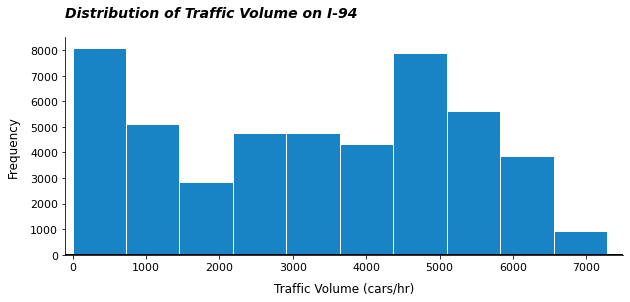

In [6]:
def pretty_print(df, header):
    print(tabulate(df, headers= header, tablefmt='psql', numalign="right"))
    
def create_histogram(df, column, main_title, hist_color):
    with sns.axes_style("darkgrid"):
        df[column].plot.hist(color = hist_color)
        plt.title(main_title, loc='left', fontstyle='italic', pad=20, fontsize=14, fontweight='bold')
        plt.xlabel('Traffic Volume (cars/hr)', labelpad=10, fontsize='12')
        plt.ylabel('Frequency', labelpad=10, fontsize='12')
        plt.grid(False)
        plt.xlim(-100,7500)
        plt.ylim(0,8500)
        plt.xticks(fontsize=11)
        plt.yticks(fontsize=11)
        plt.tick_params(direction='out')
        sns.despine()
        plt.axhline(y = 0, color = 'black', linestyle = '-', linewidth=2)
        
    
table = (metro['traffic_volume'].describe()).to_frame()
pretty_print(table, ['statistic', 'values'])

plt.figure(figsize=(10,4))
plt.subplot(1,1,1)
create_histogram(metro, 'traffic_volume', 'Distribution of Traffic Volume on I-94', hist_color="#1984c5")
plt.show()

### Observations
- *Traffic volume around the station does not present with a skewed, uniform nor normal distribution.*
- *Hourly traffic volume varied between 0 to 7,280 cars per hour, averaging around 3,260 cars. The mean and median values of the traffic distribution are also close to one another (mean: 3259, median: 3380)*
- *Traffic volumes between 0-1,500 and 4,500-5,500 are the most frequent, while volumes greater than 6,500 are less common.*
- *About 25% of the time, traffic volume was under 1,193 cars per hour. At the higher end of the spectrum, over 4933 cars pass through the station 25% of the time. This can also be confirmed by the two peaks from our chart.*

The last observation gives us an interesting question to explore. Could there be a time variable explanation? Considering that there could be less action at nighttime when people are at sleep than at day when people are usually off to work or returning. We will explore this possibility by comparing nightime to daytime data.

## Traffic Volumes: Day vs Night

We'll start by dividing the dataset into two parts:
- `Daytime data`: hours from 7 a.m. to 7 p.m (non-inclusive)
- `Nighttime data`: hours from 7 p.m. to 7 a.m (non-inclusive)

This may not be the perfect criteria for distinguishing nighttime from daytime, but it's a good starting point:

In [7]:
day = metro[(metro['date_time'].dt.hour >=7) & (metro['date_time'].dt.hour <19)]
night = metro[(metro['date_time'].dt.hour <7) | (metro['date_time'].dt.hour >=19)]

print('The shape of the I-94 daytime data is: {}'.format(day.shape))
print('The shape of the I-94 nighttime data is: {}'.format(night.shape))

The shape of the I-94 daytime data is: (23877, 9)
The shape of the I-94 nighttime data is: (24327, 9)


Now that we have extracted our daytime and nighttime data, let's attempt to visualize their respective traffic distributions:

+-------+-----------+-------------+
|       |   daytime |   nighttime |
|-------+-----------+-------------|
| count |     23877 |       24327 |
| mean  |   4762.05 |     1785.38 |
| std   |   1174.55 |     1441.95 |
| min   |         0 |           0 |
| 25%   |      4252 |         530 |
| 50%   |      4820 |        1287 |
| 75%   |      5559 |        2819 |
| max   |      7280 |        6386 |
+-------+-----------+-------------+


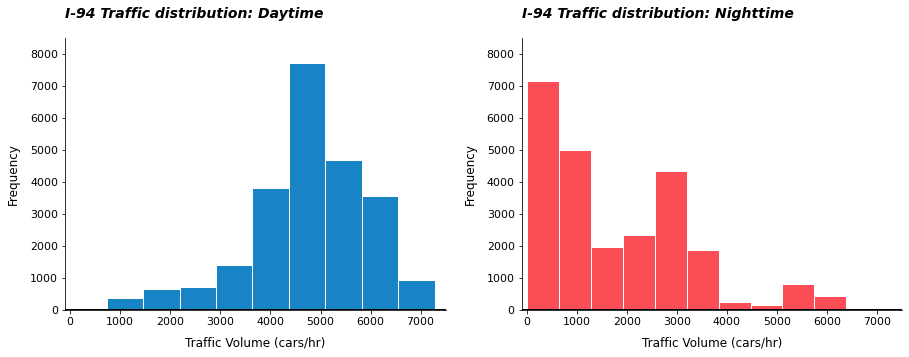

In [8]:
day_desc, night_desc = day[['traffic_volume']].describe(), night[['traffic_volume']].describe()
day_desc.columns= ['daytime']
day_desc['nighttime'] = night_desc
merged_desc = day_desc

pretty_print(merged_desc, 'keys')

# Visualization
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
create_histogram(day, 'traffic_volume','I-94 Traffic distribution: Daytime', '#1984c5')

plt.subplot(1,2,2)
create_histogram(night, 'traffic_volume','I-94 Traffic distribution: Nighttime', '#fa4d56')
plt.show()

### Observations
**Daytime:**
- *Traffic distribution is left-skewed. This means that the incidence of fewer traffic are very rare, and higher traffic volumes are much more common. The bulk of traffic lies in the range of 4000 to 6500 vehicles per hour*.

**Nighttime**
- *Nighttime data shows a right skew, indicating an opposite pattern to daytime trends. At night, higher traffic volumes are less common. Infact, a considerable proportion of nighttime traffic was between 0 to 3000 vehicles per hour, much lesser than what was observed at daytime*

**Descriptive statistics of nightime data when compared to daytime also bolsters our claims**
- *Mean nighttime traffic is 1,785: far lower than the mean daytime traffic of 4,762.*
- *75% of daytime traffic were in the range of 4,252 - 7,280 cars/hour.*
- *Nighttime recorded low traffic volumes in general. 75% of the time, the traffic recorded was lesser than 2,819 vehicles per hour.*

Considering that our goal to analyze the heavy traffic indicators, daytime data would be best suited for our analysis. We will focus on daytime traffic for now. 

## Time Indicators

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day. We are going to create a few line plots showing how the traffic volume changed according to the following parameters:
- Month
- Day of the week
- Hour of the day

### 1. Traffic Volume By Month

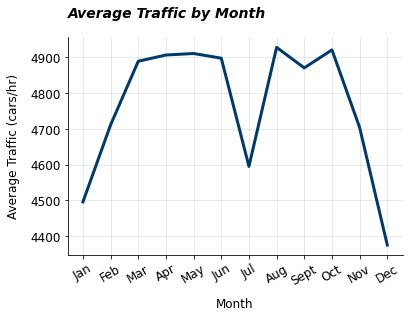

In [9]:
def group_column(df, col, aggr_col, new_col_name, sort=False):
    result = (df.groupby(col)[aggr_col]
                     .mean()
                     .reset_index(name= new_col_name)
             )
    return result

def create_line(df, x_val, y_val, main_title, x_title, line_color='#003a6d', xtype=None,
                x_limit=None, y_limit=None):
   
    plt.plot(df[x_val], df[y_val], color= line_color, linewidth=3)
    plt.title(main_title, fontstyle='italic', fontweight='bold', fontsize=14, pad=20, loc='left')
    plt.xlabel(x_title, fontsize=12, labelpad=10)
    plt.ylabel('Average Traffic (cars/hr)', fontsize=12, labelpad=10)
    plt.xlim(x_limit)
    plt.ylim(y_limit)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, color='black', alpha=0.1)
    sns.despine()
    
    if xtype.lower()=='month':
        plt.xticks(range(1,13), rotation=30,
                   labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                           'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
        
    elif xtype.lower() == 'day':
        plt.xticks(range(1,32))
        
    elif xtype.lower() == 'day_of_week':
        plt.xticks(range(0,7), rotation=30, 
                   labels=['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
        
    elif xtype.lower() == 'day_hour':
        plt.xticks(range(7,19))

day['month'] = day['date_time'].dt.month
month_traffic = group_column(day, 'month', 'traffic_volume', 'avg_traffic')

create_line(month_traffic, 'month', 'avg_traffic', 'Average Traffic by Month',
            'Month', xtype='month')
plt.show()

### Observations

- *Traffic volumes vary between 4,000 and 5,000 cars per hour every month. August and October are noticeably the months with the highest traffic activity. Traffic is also steadily high between March and June. On the other hand, January, February, November and December record lower traffic volumes.*
- *The traffic dip in July is unexpected. Our observations would have led us to assume that traffic volumes are generally higher at warmer periods than in the colder seasons (December, January and February). However, the notable decrease in July affects our ability to conclude.*

It would have been plausible to assume that the decreased traffic volume in July is attributed to the summer holidays around that period. However, June and August are also summer holiday months, and they do not seem to be affected by the trend. This suggests another probable cause. Let's explore our data for more insights. A good place to start is to check how traffic volumes evolved each year in July:

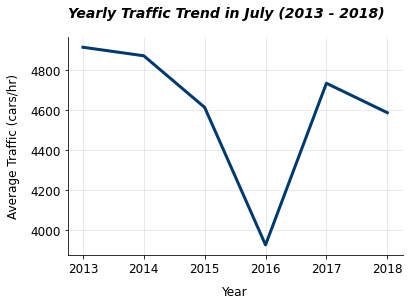

In [10]:
day['year'] = day['date_time'].dt.year
july_data = day[day['month'] == 7]

july_traffic = group_column(july_data, 'year', 'traffic_volume', 'avg_traffic')

create_line(july_traffic, 'year', 'avg_traffic', 'Yearly Traffic Trend in July (2013 - 2018)',
            'Year', xtype='year')
plt.show()

### Observation

- *On average, the traffic volume in July ranges from around 4,600 to 4800 cars per hour (similar to other summer months). However, there was a significant decrease in 2016. This occurrence might explain the low average we previously observed for July. Could a particular event have happened in 2016 to affect this traffic volume?*

Let's explore daytime traffic data over all the months in 2016: 

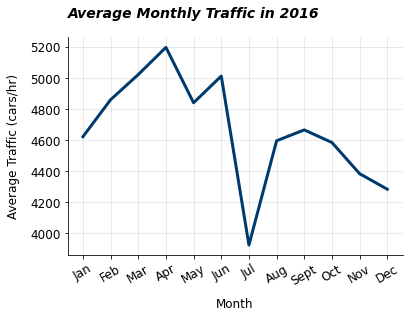

In [11]:
traffic_2016 = day[day['year'] == 2016]
month_2016 = group_column(traffic_2016, 'month', 'traffic_volume', 'avg_traffic')

create_line(month_2016, 'month', 'avg_traffic', 'Average Monthly Traffic in 2016',
            'Month', xtype='month')
plt.show()

July 2016 looks undoubtedly interesting. Something significant must have happened to cause this drop in traffic activity. Next, let's explore traffic activity over all the days in July 2016:

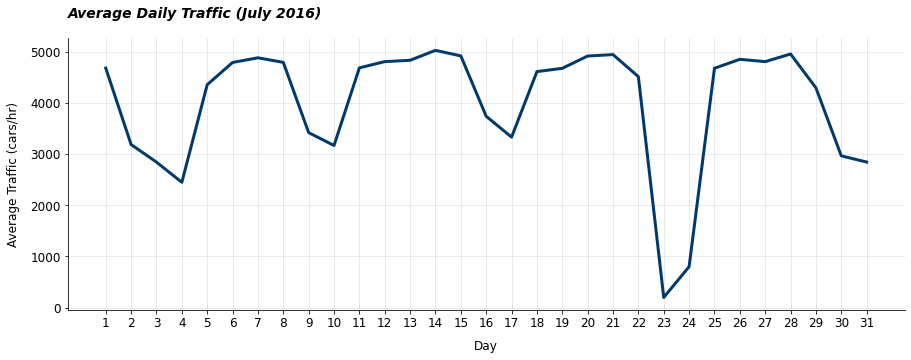

In [12]:
traffic_2016['day'] = traffic_2016['date_time'].dt.day
july_2016 = traffic_2016[traffic_2016['month'] == 7]

july_daily = group_column(july_2016, 'day', 'traffic_volume', 'avg_traffic')

plt.figure(figsize=(15,5))
create_line(july_daily, 'day', 'avg_traffic', 'Average Daily Traffic (July 2016)',
            'Day', xtype='day')
plt.show()

### Observation

- *Something unusual happened on the 23rd and 24th of July 2016 where traffic volumes plunged lesser than 1000 cars per hour. There could have been a road construction at the time, a conflict, or an accident, which could have reduced traffic activity on the road.*

A quick search of 23rd and 24th July 2016 with the keywords I-94 construction will yeild some favourable results. It appears that road construction activities took place on the interstate road around that period. You can find more information about this construction work at the [Department of transportation 2016 weekly updates](https://www.dot.state.mn.us/d4/projects/alexi94hwy29/weekly.html) and in [The crain's detroit business page](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696).

### 2. Week Day and Traffic Volume

Earlier, we generated a line plot to explore how traffic volume changed each month on average. We'll now continue by building line plots for another time unit: day of the week.

To get the traffic volume averages for each day of the week, we will use the handy method `.dt.dayofweek()` to extract the day of the week from the `date_time` column. The resulting values will be a range of possible weekdays from monday (0) to Sunday (6):

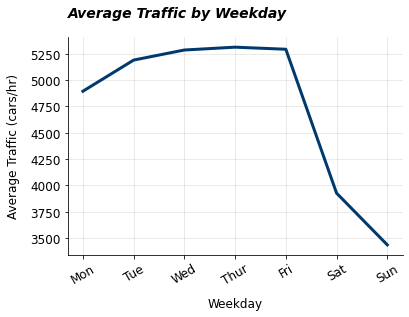

In [13]:
day['day_of_week'] = day['date_time'].dt.dayofweek

weekday_traffic = group_column(day, 'day_of_week', 'traffic_volume', 'avg_traffic')

create_line(weekday_traffic, 'day_of_week', 'avg_traffic', 'Average Traffic by Weekday',
            'Weekday', xtype='day_of_week')
plt.show()

### Observation

- *Traffic is generally higher on working days (Mondays to Fridays), with average traffic of over 4500 cars per hour. On average, weekends (Saturday and Sunday) show lower traffic volumes (less than 4000 cars per hour).*

We can thus infer that we have more traffic on working days due to the cyclic activity of people going to and returning from work. To support our inference, we could check the exact periods of the day when higher traffic volumes are recorded. If our assumption is correct, we should observe particular spikes in traffic activity during rush hours when people go to work or return to their homes.

### 3. Traffic Volume and Time of Day

We will try to generate a line plot for the time of day. The weekends, however, will pull down the average values, since they generally record less traffic activity. To prevent this from happening, we will visualize the averages separately. 

We will start by splitting the data based on the day type: business day or weekend. To do this, we will use the `dataframe.query()` method. This returns a filtered dataframe based on the results of a boolean expression:

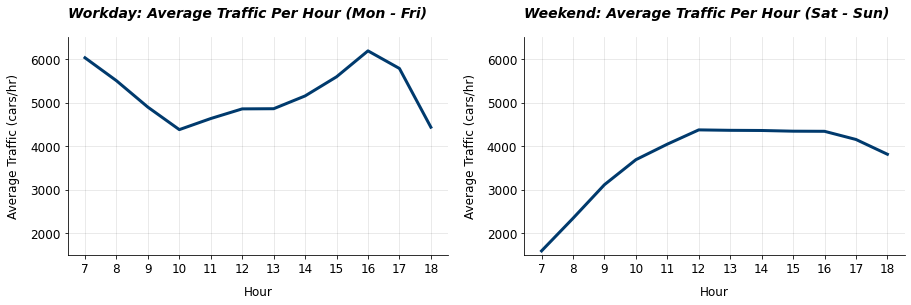

In [14]:
day['hour'] = day['date_time'].dt.hour

# Select data from Monday(0) to Friday(4)
workday = day.query("day_of_week <= 4")
# Select the weekends Saturday(5) and Sunday(6)
weekend = day.query("day_of_week > 4")

workday_traffic = group_column(workday, 'hour', 'traffic_volume', 'avg_traffic')
weekend_traffic = group_column(weekend, 'hour', 'traffic_volume', 'avg_traffic')

#Visualization
plt.figure(figsize=(15, 4))
plt.subplot(1,2,1)
create_line(workday_traffic, 'hour', 'avg_traffic', 'Workday: Average Traffic Per Hour (Mon - Fri)',
            'Hour', xtype='day_hour', y_limit=[1500,6500])

plt.subplot(1,2,2)
create_line(weekend_traffic, 'hour', 'avg_traffic', 'Weekend: Average Traffic Per Hour (Sat - Sun)',
            'Hour', xtype='day_hour', y_limit=[1500,6500])

plt.show()

### Observation
- *Our weekday chart has two peaks corresponding to 7 am and 4 pm (both over 6000 cars/hr). This agrees with the expected rush hours (7 am when most people leave for work and 4 pm when people start to head home).*
- *The weekend shows a notably different pattern. Traffic volumes are lower compared to the workdays. Traffic builds up in the afternoon between 12 pm and 4 pm (around 4500 cars/hr). This is understandable, considering that the period corresponds to weekend leisure hours.*

### Notes From I-94 Time Data Analysis
- Warmer months are busier in traffic volume.
- A road construction activity took place on I-94 between 23rd and 24 July 2016. During this period, road traffic was minimal.
- The road is busier on business days than weekends.
- On business days, 7 am and 4 pm are generally busier than other hours of the day.

## Weather Indicators

Another possible indicator of heavy traffic is weather. Our dataset provides us with a few useful columns about weather. Some of these columns are numerical while the others are categorical:

- **Numerical**: `temp`, `rain_1h`, `snow_1h` and `clouds_all`.
- **Categorical**: `weather_main`  and `weather_description`.


### 1. Numerical Weather Indicators
Let's start by looking at the correlation of numerical columns with `traffic_volume`:

In [15]:
day[['temp','rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']].corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
Name: traffic_volume, dtype: float64

From the output above, it appears that only temperature shows some correlation with traffic volume (approximately 0.13). This correlation is very minimal and we will attempt to demonstrate it using a scatterplot:

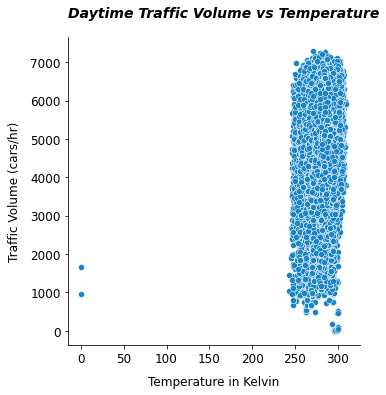

In [16]:
def create_scatter(df, x_val, y_val, main_title, x_limit=None, dot_color='#1984c5'):
    sns.relplot(data=day, x=x_val, y=y_val, color=dot_color)
    plt.title(main_title, fontstyle='italic', fontweight='bold', fontsize=14, pad=20, loc='left')
    plt.xlim(x_limit)
    plt.ylabel('Traffic Volume (cars/hr)',fontsize=12, labelpad=10)
    plt.xlabel('Temperature in Kelvin', fontsize=12, labelpad=10)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
create_scatter(day, 'temp', 'traffic_volume', 'Daytime Traffic Volume vs Temperature')
plt.show()

We have two points on the scatterplot with zero temperature. This is quite unusual. We will plot the graph again, ignoring the zero temperature. Let's set our x-axis limit to a range above zero kelvins.

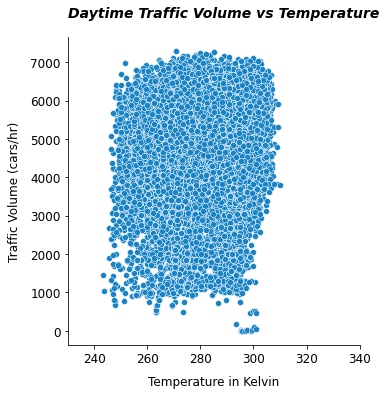

In [17]:
create_scatter(day, 'temp', 'traffic_volume', 'Daytime Traffic Volume vs Temperature', x_limit=[230,340])
plt.show()

It appears that there isn't a strong correlation to conclude anything  useful about temperature and traffic volume. Let's turn our attention to the categorical columns: `weather_main` and `weather description`.

### 2. Categorical Weather Indicators

We will calculate the average traffic volume associated with each unique weather type and weather description, then visualize our findings.

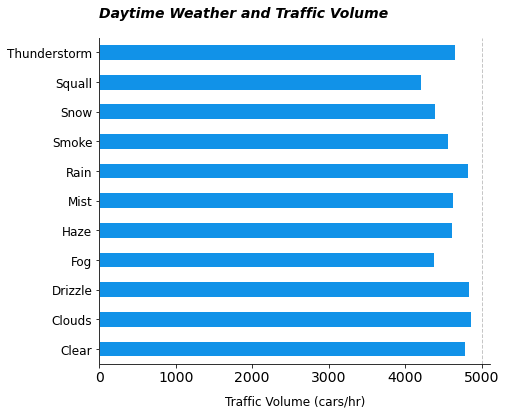

In [18]:
def create_barh(df, x_val, y_val,  main_title, bar_color="#1192e8", size=None):
    df.plot.barh(x_val, y_val, legend=None, color=bar_color, figsize = size)
    plt.title(main_title, fontsize=14, fontweight='bold', pad=20, loc='left', fontstyle='italic')
    plt.ylabel(None)
    plt.xlabel('Traffic Volume (cars/hr)', labelpad=10, fontsize=12)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=12)
    sns.despine(left=True)
    plt.axvline(x = 0, color = '#333', linestyle = '-', linewidth=2)
    plt.axvline(x = 5000, color = '#444', linestyle = '--', linewidth=1, alpha=0.3)

weather_type = group_column(day, 'weather_main', 'traffic_volume', 'avg_traffic')
create_barh(weather_type, 'weather_main', 'avg_traffic','Daytime Weather and Traffic Volume', size=(7,6))
plt.show()

### Observation

- *For time indicators, we considered heavy traffic when we observed averages of over 5,000 cars per hour. However, no weather category seems to cause traffic that exceeds the 5,000 mark. Although one could note that on cloudy, drizzly, rainy and clear days, traffic approaches 5,000 cars, there is not enough evidence to conclude the relationship between weather types and heavy traffic.*

Let's explore the more detailed weather description column to see if we can draw some additional insights:

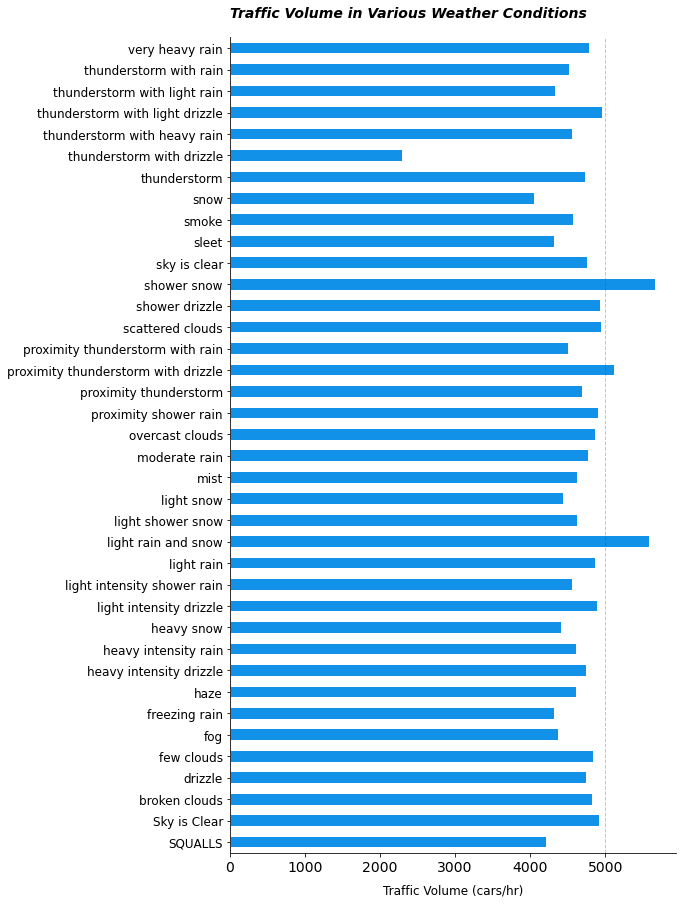

In [19]:
weather_desc = group_column(day, 'weather_description', 'traffic_volume', 'avg_traffic')

create_barh(weather_desc, 'weather_description', 'avg_traffic',
            'Traffic Volume in Various Weather Conditions', size=(8,15))

### Observations

- *There are three weather situations where traffic volume exceeds 5,000 cars:*
    - *Shower snow*.
    - *Light rain and snow*.
    - *Proximity thunderstorm with drizzles*.
- *These situations point to bad weather. It could be possible that people drove cars to work in bad weather rather than commuting through alternatives like bikes or taking walks. On careful inspection, however, we can see some other extreme days where people did not exhibit similar behaviours (for example, during thunderstorms with heavy rain). This makes it hard to conclude the underlying reasons for sure.*

## Traffic Indicators at Nighttime

## Nightime Traffic by Month

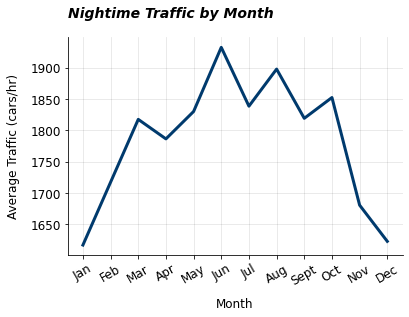

In [20]:
night['month'] = night['date_time'].dt.month
month_traffic = group_column(night, 'month', 'traffic_volume', 'avg_traffic')

create_line(month_traffic, 'month', 'avg_traffic', 'Nightime Traffic by Month',
            'Month', xtype='month')
plt.show()

### Observation
- *The highest nighttime traffic occurs in June, July, August and September (the summer months). Summer months are generally known to have longer days, encouraging people to stay out longer and return home late, hence the busier roads at night.*

## Weekday and Nightime Traffic

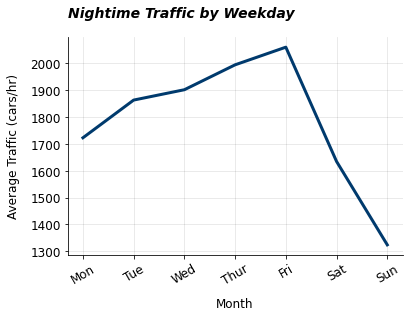

In [21]:
night['day_of_week'] = night['date_time'].dt.dayofweek

weekday_traffic = group_column(night, 'day_of_week', 'traffic_volume', 'avg_traffic')

create_line(weekday_traffic, 'day_of_week', 'avg_traffic', 'Nightime Traffic by Weekday',
            'Month', xtype='day_of_week')
plt.show()

### Observation
- *Traffic is highest on Friday nights and minimal during weekends. This might be due to the tendency of people to engage in leisure activities on Friday evenings, after the long working week. People may decide to go clubbing, visit restaurants or have dinner with their friends on Friday nights.*

Let's investigate further by exploring nightime traffic during the working days and weekends. We will analyse these seperately, knowing that the weekend values could pull down our average:

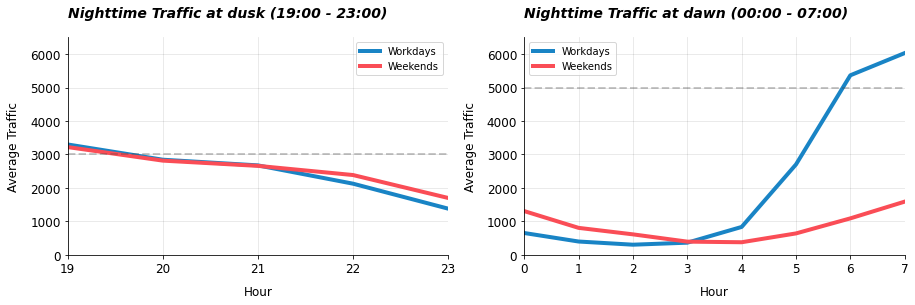

In [34]:
def merge_line_plots(df_list, main_title, x_limit, name_list=None, color_list=['#1984c5', '#fa4d56']):
        plt.plot(df_list[0]['hour'], df_list[0]['avg_traffic'], 
                 color= color_list[0], label=name_list[0], linewidth=4)
        plt.plot(df_list[1]['hour'], df_list[1]['avg_traffic'], 
                 color= color_list[1], label=name_list[1], linewidth=4)
        plt.xlabel('Hour', fontsize=12, labelpad=10)
        plt.ylabel('Average Traffic', fontsize=12, labelpad=10)
        plt.title(main_title, fontstyle='italic', fontweight='bold', fontsize=14, pad=20, loc='left')
        plt.xlim(x_limit)
        plt.ylim(0,6500)
        plt.xticks(range(x_limit[0], x_limit[1]+1), fontsize=12)
        plt.yticks(fontsize=12)
        plt.grid(True, color='black', alpha=0.1)
        sns.despine()
        plt.legend()
        
adj_night = metro[(metro['date_time'].dt.hour <=7) | (metro['date_time'].dt.hour >=19)]
adj_night['day_of_week'] = adj_night['date_time'].dt.dayofweek

adj_night['hour'] = adj_night['date_time'].dt.hour
# select dusk hours (19:00 - 23:00) for workdays
workday_dusk = adj_night.query("(hour >= 19) & (day_of_week <=4)")
# select dawn hours (00:00 - 06:00) for workdays
workday_dawn = adj_night.query("(hour < 19) & (day_of_week <=4)")
# select dusk hours (19:00 - 23:00) for weekends
weekend_dusk = adj_night.query("(hour >= 19) & (day_of_week >4)" )
# select dawn hours (00:00 - 06:00) for weekdays
weekend_dawn = adj_night.query("(hour < 19) & (day_of_week >4)" )

workday_dusk_traffic = group_column(workday_dusk, 'hour', 'traffic_volume', 'avg_traffic')
workday_dawn_traffic = group_column(workday_dawn, 'hour', 'traffic_volume', 'avg_traffic')
weekend_dusk_traffic = group_column(weekend_dusk, 'hour', 'traffic_volume', 'avg_traffic')
weekend_dawn_traffic = group_column(weekend_dawn, 'hour', 'traffic_volume', 'avg_traffic')

dusk_list = [workday_dusk_traffic, weekend_dusk_traffic]
dawn_list = [workday_dawn_traffic, weekend_dawn_traffic]
names = ['Workdays', 'Weekends']

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
merge_line_plots(dusk_list, 'Nighttime Traffic at dusk (19:00 - 23:00)', x_limit=(19,23), name_list=names)
plt.axhline(y = 3000, color = '#444', linestyle = '--', linewidth=2, alpha=0.3)

plt.subplot(1,2,2)
merge_line_plots(dawn_list, 'Nighttime Traffic at dawn (00:00 - 07:00)', x_limit=(0,7), name_list=names)
plt.axhline(y = 5000, color = '#444', linestyle = '--', linewidth=2, alpha=0.3)
plt.show()

### Observations
- *Generally, there is not much difference between traffic volumes at dusk (19:00 - 23:00) during working days and weekends. However, some difference lies in traffic activity at dawn. Traffic activity starts to build up at 04:00 during workdays. This may be explained by the tendency of people to leave their homes early for work on workdays.*

## Are Friday Nights Busier Than Other Nights on Average?

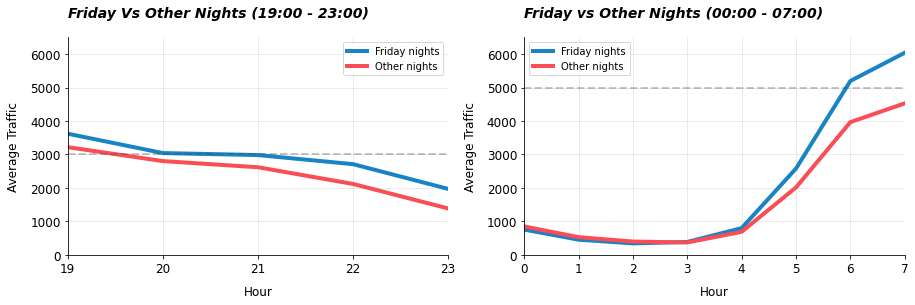

In [33]:
# select dusk hours (19:00 - 23:00) for workdays
friday_dusk = adj_night.query("(hour >= 19) & (day_of_week == 4)")
# select dawn hours (00:00 - 06:00) for workdays
friday_dawn = adj_night.query("(hour < 19) & (day_of_week ==4)")
# select dusk hours (19:00 - 23:00) for weekends
others_dusk = adj_night.query("(hour >= 19) & (day_of_week !=4)" )
# select dawn hours (00:00 - 06:00) for weekdays
others_dawn = adj_night.query("(hour < 19) & (day_of_week !=4)" )

friday_dusk_traffic = group_column(friday_dusk, 'hour', 'traffic_volume', 'avg_traffic')
friday_dawn_traffic = group_column(friday_dawn, 'hour', 'traffic_volume', 'avg_traffic')
others_dusk_traffic = group_column(others_dusk, 'hour', 'traffic_volume', 'avg_traffic')
others_dawn_traffic = group_column(others_dawn, 'hour', 'traffic_volume', 'avg_traffic')

dusk_list = [friday_dusk_traffic, others_dusk_traffic]
dawn_list = [friday_dawn_traffic, others_dawn_traffic]
names = ['Friday nights', 'Other nights']

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
merge_line_plots(dusk_list, 'Friday Vs Other Nights (19:00 - 23:00)', x_limit=(19,23), name_list=names)
plt.axhline(y = 3000, color = '#444', linestyle = '--', linewidth=2, alpha=0.3)

plt.subplot(1,2,2)
merge_line_plots(dawn_list, 'Friday vs Other Nights (00:00 - 07:00)', x_limit=(0,7), name_list=names)
plt.axhline(y = 5000, color = '#444', linestyle = '--', linewidth=2, alpha=0.3)
plt.show()

### Observation
- *Nighttime traffic takes some time to cool off on Friday nights. Traffic volume shows about 3,000 cars until 22:00 hrs. On other nights traffic seems to submerge below 3,000 cars after about 20:00 hrs.*
- *Traffic volume also appears to increase on Saturday mornings between 04:00 hrs to 07:00 hrs than on other days. The reason for this is quite unclear; it might be due to the number of people returning from late-night activities on Friday.*

## Weather Indicators of Nightime Traffic

### 1. Numerical Indicators

In [24]:
night[['temp','rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']].corr()['traffic_volume']

temp              0.094004
rain_1h          -0.012972
snow_1h          -0.007453
clouds_all        0.012832
traffic_volume    1.000000
Name: traffic_volume, dtype: float64

There appears to be no solid correlation between any of the numerical indicators and traffic volume. However, we can attempt to visualize the relationship between temperature and traffic volume since it appears mildly stronger than the others:

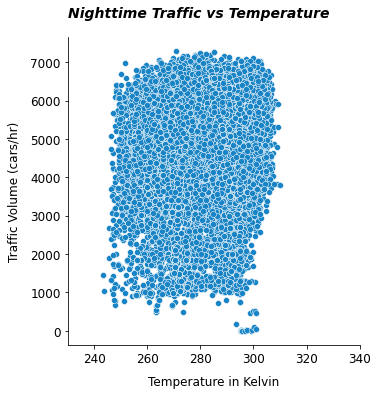

In [25]:
create_scatter(night, 'temp', 'traffic_volume', 'Nighttime Traffic vs Temperature', 
               x_limit=[230,340])
plt.show()
plt.show()

It's clear that there is no correlation between temperature and Nighttime traffic.

### 2. Categorical Weather Indicators

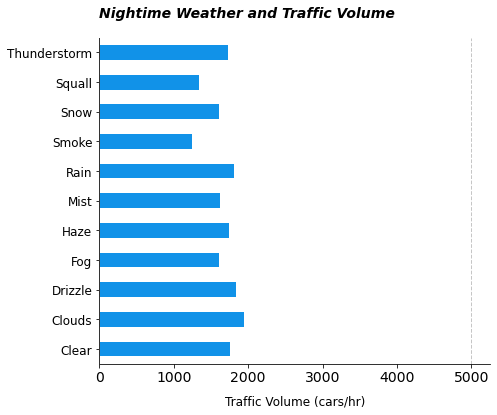

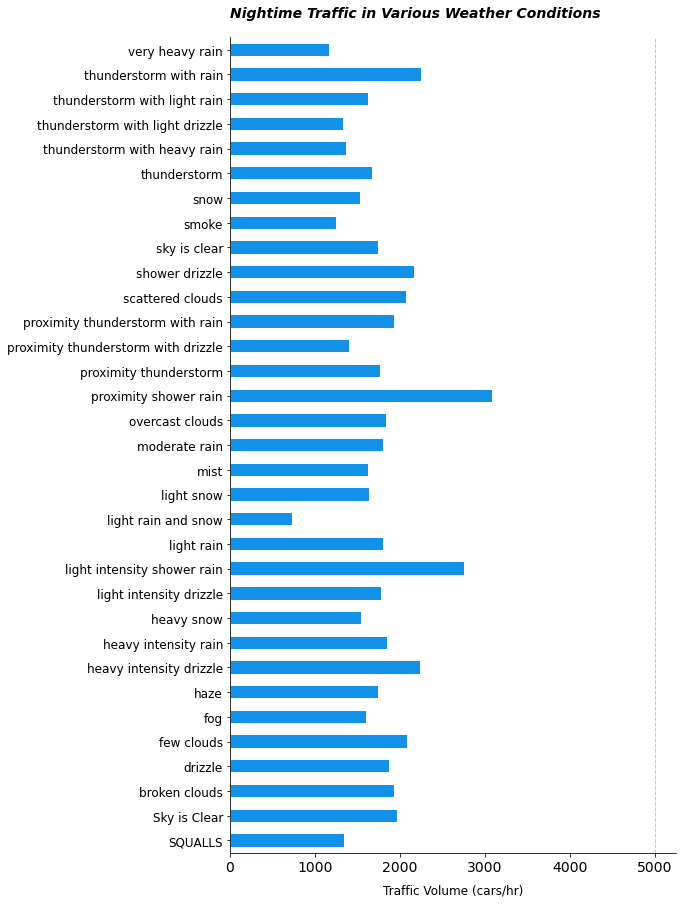

In [26]:
weather_type = group_column(night, 'weather_main', 'traffic_volume', 'avg_traffic', sort=True)
create_barh(weather_type, 'weather_main', 'avg_traffic','Nightime Weather and Traffic Volume', 
            size=(7,6))
plt.show()

weather_desc = group_column(night, 'weather_description', 'traffic_volume', 'avg_traffic', sort=True)
create_barh(weather_desc, 'weather_description', 'avg_traffic',
            'Nightime Traffic in Various Weather Conditions', size=(8,15))
plt.show()

### Observation

- *The bar graphs do not show any weather type as a significant indicator of nighttime traffic. Two weather descriptions show some associations with  moderate traffic volumes at night:*
    - *proximity shower rain*
    - *light intensity shower rain*
- *Both categories refer to bad weather combined with rain. Bad weather could cause people to prefer cars as better means of a commute than bikes and other alternatives.*
